# **Theory Questions (28%)**

1) To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

2) T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

3) A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

4) What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

# Answers

1) Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

$$\begin{equation}
Accuracy = \frac{Number\space of\space Correct\space predictions}{Total\space number\space of\space predictions\space made}
\end{equation}
$$
It works well only if there are equal number of samples belonging to each class.
For example, consider that there are **99.67%** samples of class A and **0.33%** samples of class B in our training set. Then our model can easily get **99.67%** training accuracy by simply predicting every training sample belonging to class A.
When the same model is tested on a test set with **60%** samples of class A and **40%** samples of class B, then the test accuracy would drop down to **60%**. Classification Accuracy is great, but gives us the false sense of achieving high accuracy.
And exactly that is why we prefer in our case to use performance model, we have here not a huge number of data and we can get a better results. 

2)  In the **first case**, we have:

`Advantages`: implementation of visualizations is simple, less weight training (Less time spend to calculate).

`Disadvantages`: A decrease in the number of functions can lead to a lack of information in the output and an increase in the number of qualitative and quantitative classification errors.

In the **Second case**: 

`Advantages`: The number of functions is greater, as well as the potential reduction in the number of errors mentioned above, less chances to get bias.

`Disadvantages`: The complexity of processes as well as the speed of code execution increases, more risk for overfitting.

3) We will recommend the histologist to use the nonlinear SVM method, since it can * scale * data that at first glance looks inseparable, and accordingly there will be a possibility, a chance to find suitable boundaries by which the data can already be divided. It is theoretically possible to think of a situation in which it would be more profitable, more convenient and faster to use linear SVM or logistic regression, but in general, these methods are less accurate in cases with analyzes of histological samples.

4) **Logistic regression** focuses on maximizing the of the data. The farther the data lies from the separating hyperplane (on the correct side), the happier LR is.

An **SVM** tries to find the separating hyperplane that maximizes the distance of the closest points to the margin (the support vectors). If a point is not a support vector, it doesn’t really matter. 

**Logistic regression Hyperparameters**
Solver
This parameter can take few values such as ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’. The default value for this parameter is ’lbfgs’. Now the question arises when to use what. The answer to this is as follows:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
‘liblinear’ and ‘saga’ also handle L1 penalty
‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not support setting penalty='none'
2. Penalty

This parameter can take values such as ‘l1’, ‘l2’, ‘elasticnet’, ‘none’. The default value is ’l2’. Penalty is used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

3. class_weightdict or ‘balanced’

If the classes are imbalance in the data then this parameter is used. The default value is None. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

4. multi_class

This parameter takes values ‘auto’, ‘ovr’, ‘multinomial’. The default value is ’auto’. If the option chosen is ‘ovr’, then a binary problem is fit for each label. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

***SVM Hyperparameters**

**Gamma $ (\gamma) $** is a hyperparameter used with non-linear SVM. One of the most commonly used non-linear kernels is the radial basis function (RBF). Gamma parameter of RBF controls the distance of the influence of a single training point.
Low values of gamma indicate a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

There is obviously a trade-off between these two goals which and it is controlled by **C** which adds a penalty for each misclassified data point.
If C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassification.
If C is large, SVM tries to minimize the number of misclassified examples due to the high penalty which results in a decision boundary with a smaller margin. The penalty is not the same for all misclassified examples. It is directly proportional to the distance to the decision boundary.

# **Coding Asignment (72%)**

# Question 1

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve, log_loss
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate, KFold
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import random
from sklearn.decomposition import PCA

# matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 12

random.seed(2)

col_names = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst',
             'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
             'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
             'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
             'Diagnosis', 'Family History']
X = pd.read_csv("HW2_data.csv", header=None, names=col_names).dropna()
X = X.drop([0])
data_for_rfc = X

categorical_feature_mask = X.dtypes == object
categorical_cols = X.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
X.loc[:, 'Gender':'Diagnosis'] = X.loc[:, 'Gender':'Diagnosis'].apply(lambda col: le.fit_transform(col))

y = X['Diagnosis']
X.drop(columns='Diagnosis', inplace=True)
X = X.to_numpy()  # can also be X.values
y = y.to_numpy()  # can also be y.values
X = np.concatenate((np.ones((len(y), 1)), X), axis=1)  # add bias term

# Question 2

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train = X_train.astype(np.int32)
X_test = X_test.astype(np.int32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# Question 3

**Section A**

In [3]:
#  Part 3
train_percentages = X_train[:, 2:18].sum(axis=0) / np.size(X_train, 0) * 100
train_percentages = train_percentages.astype(np.int32)
test_percentages = X_test[:, 2:18].sum(axis=0) / np.size(X_test, 0) * 100
test_percentages = test_percentages.astype(np.int32)
delta = np.absolute(train_percentages - test_percentages)
array_of_arrays = np.array([train_percentages, test_percentages, delta])
array_of_arrays = np.swapaxes(array_of_arrays, 0, 1)
column_values = ['Train%', 'Test%', '|Delta%|']
Pos_feature = ['Gender', 'Increased Urination', 'Increased Thirst',
               'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
               'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
               'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
               'Family History']

df = pd.DataFrame(data=array_of_arrays,
                  index=Pos_feature,
                  columns=column_values)
print(df)
# print('the naive classifier achieved an accuracy of %.2f%' % (100*y_test.value_counts()['B']/len(y_test)))

                     Train%  Test%  |Delta%|
Gender                   62     63         1
Increased Urination      50     47         3
Increased Thirst         44     42         2
Sudden Weight Loss       40     46         6
Weakness                 57     60         3
Increased Hunger         46     41         5
Genital Thrush           22     19         3
Visual Blurring          45     39         6
Itching                  48     47         1
Irritability             25     20         5
Delayed Healing          45     45         0
Partial Paresis          45     32        13
Muscle Stiffness         37     35         2
Hair Loss                33     39         6
Obesity                  15     22         7
Family History           50     53         3


**Answers:**

**1)** If we do not balance the data, then when dividing the data into train and test groups, we can accidentally get a group, for example, consisting entirely of men or women, suffering from increased urination and not, and so on, that is, an irrelevant set of values on a certain basis.

**2)** We use an auxiliary parameter - "stratify" to keep the proportions of the classes.

**Section B**

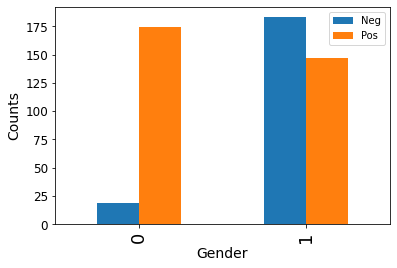

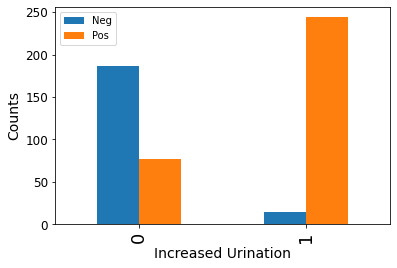

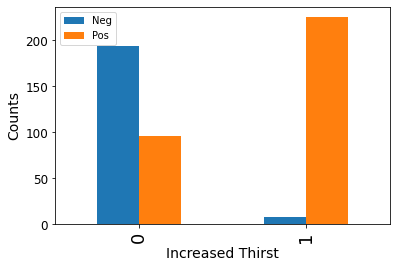

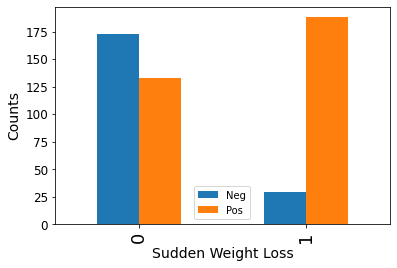

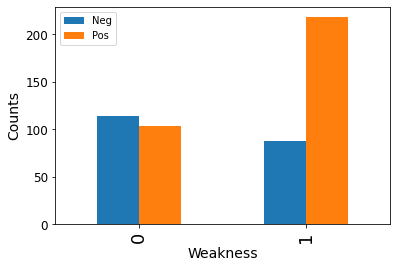

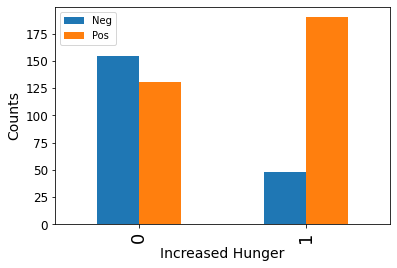

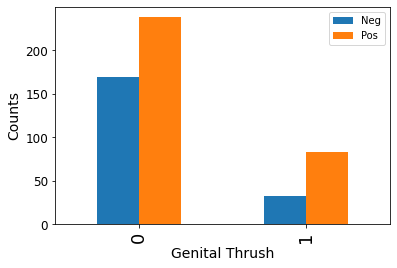

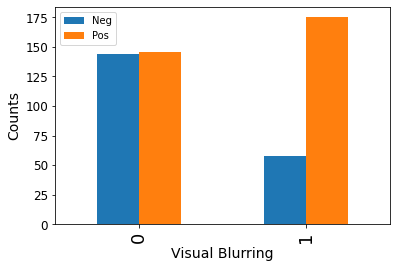

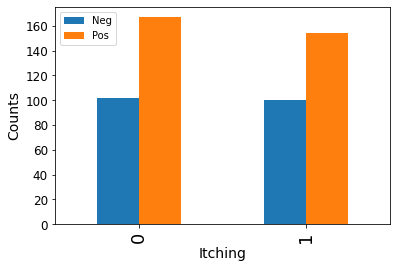

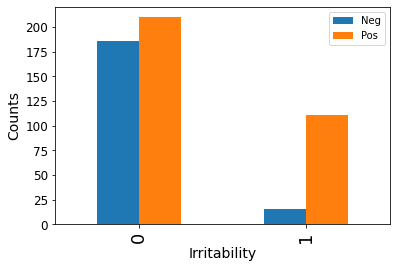

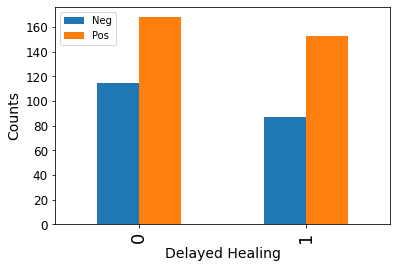

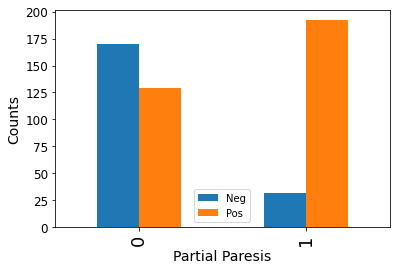

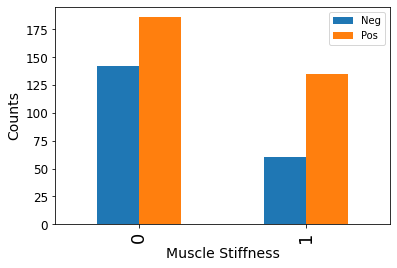

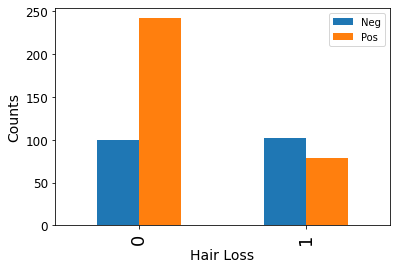

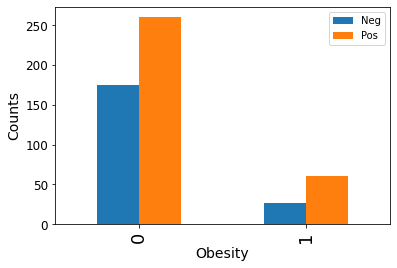

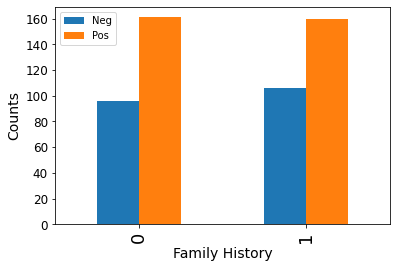

In [4]:
# Part 3b
X = pd.DataFrame(X, columns=('bias', 'Age', 'Gender', 'Increased Urination', 'Increased Thirst',
                             'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
                             'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
                             'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
                             'Family History'))
Genders = ['female','male']
for f in X.columns:
    if f == "Age" or f == "bias":
        continue
    series = X.groupby([f, y]).size().unstack(level=1).plot(kind='bar')
    plt.legend(['Neg','Pos'])
    #plt.bar(Genders, )
    plt.ylabel('Counts')
    plt.show()
    # left 1-2 coloumns - female, right, 3-4 coloumns - male, blue - negative, orange - positive

**Section D**

**1)** In this case, we do not have enough profiles to make confident statements. There is a theory that type 1 diabetes occurs more often in childhood, before the age of 20, but such data are not enough in our sample. The data on age distribution looks incomplete if we want to make a complete statistics.

**2)** As far as we can judge, the parameters of increased urination and increased thirst can be one of the most important parameters (based on the data from the graphs and confirming the own experience of one of the students). In other words, this data can help provide a more accurate final forecast. For a more accurate preliminary analysis, you can add information about the fasting blood sugar level of each patient to the profile data.

# Question 4

In [5]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)
X_train_hv = one_hot_encoder.fit_transform(X_train)
X_test_hv = one_hot_encoder.transform(X_test)

print(X_train_hv)
print(X_test_hv)
print(X_train_hv.shape)
print(X_test_hv.shape)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]]
[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]
(418, 84)
(105, 84)


# Question 5

In [6]:
#  Defining a function for evaluation metrics of train and test sets

calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]


def metrics_evaluation(Y_test, Y_pred):
    TN = calc_TN(Y_test, y_pred)
    FP = calc_FP(Y_test, y_pred)
    FN = calc_FN(Y_test, y_pred)
    TP = calc_TP(Y_test, y_pred)
    Se = TP / (TP + FN)
    Sp = TN / (TN + FP)
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)
    Acc = (TP + TN) / (TP + TN + FP + FN)
    F1 = (2 * Se * PPV) / (Se + PPV)

    return Se, Sp, PPV, NPV, Acc, F1

**Naive classifier**

In [7]:
y_test = pd.DataFrame(data=y_test)
print('The naive classifier achieved an accuracy of %.2f%%.' % (100 * y_test.value_counts()[1] / len(y_test)))

The naive classifier achieved an accuracy of 54.29%.


**Logistic regression**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END logistic__C=100.0, logistic__penalty=l2; accuracy: (train=1.000, test=0.929) f1: (train=1.000, test=0.942) precision: (train=1.000, test=0.961) recall: (train=1.000, test=0.925) roc_auc: (train=1.000, test=0.968) total time=   0.2s
[CV 2/5] END logistic__C=100.0, logistic__penalty=l2; accuracy: (train=1.000, test=0.988) f1: (train=1.000, test=0.990) precision: (train=1.000, test=1.000) recall: (train=1.000, test=0.981) roc_auc: (train=1.000, test=0.994) total time=   0.2s
[CV 3/5] END logistic__C=100.0, logistic__penalty=l2; accuracy: (train=1.000, test=0.917) f1: (train=1.000, test=0.933) precision: (train=1.000, test=0.942) recall: (train=1.000, test=0.925) roc_auc: (train=1.000, test=0.962) total time=   0.0s
[CV 4/5] END logistic__C=100.0, logistic__penalty=l2; accuracy: (train=1.000, test=0.952) f1: (train=1.000, test=0.962) precision: (train=1.000, test=0.962) recall: (train=1.000, test=0.962) roc_auc: (trai

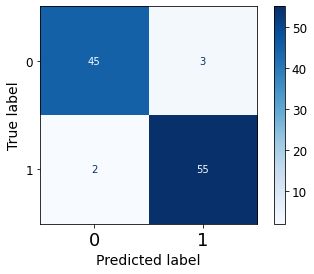

In [8]:
solver = 'lbfgs'
scaler = StandardScaler()
max_iter = 400
n_splits = 5
penalty = ['l2']
log_reg = LogisticRegression(random_state=1, max_iter=max_iter,solver=solver)
lmbda = np.array([0.01, 0.01, 1, 10, 100, 1000])

skf = StratifiedKFold(n_splits = n_splits, random_state=2, shuffle=True)

pipe = Pipeline(steps=[('scale', scaler), ('logistic', log_reg)])
log_lin = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': penalty},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)
log_lin.fit(X_train_hv, y_train)


best_log_reg = log_lin.best_estimator_
print(log_lin.best_params_)


y_pred = best_log_reg.predict(X_test_hv)
y_pred_proba = best_log_reg.predict_proba(X_test_hv)

plot_confusion_matrix(best_log_reg, X_test_hv, y_test, cmap=plt.cm.Blues)
plt.grid(False)

print('Sensitivity is {:.2f} \nSpecificity is {:.2f} \nPPV is {:.2f} \nNPV is {:.2f} \nAccuracy is {:.2f} \nF1 is {:.2f} '.format(*metrics_evaluation(y_test, y_pred)))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba[:,1])))

**Linear SVM**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.937, test=0.917) f1: (train=0.950, test=0.933) precision: (train=0.961, test=0.942) recall: (train=0.938, test=0.925) roc_auc: (train=0.978, test=0.971) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.892, test=0.810) f1: (train=0.910, test=0.840) precision: (train=0.958, test=0.894) recall: (train=0.867, test=0.792) roc_auc: (train=0.971, test=0.945) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.925, test=0.905) f1: (train=0.938, test=0.926) precision: (train=0.979, test=0.909) recall: (train=0.900, test=0.943) roc_auc: (train=0.976, test=0.957) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.910, test=0.892) f1: (train=0.927, test=0.913) precision: (train=0.960, test=0.922) recall: (train=0.896, test=0.904) roc_auc: (train=0.974, test=0.946) total t

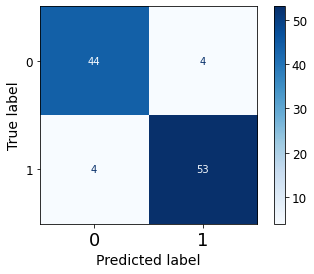

In [9]:
svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', scaler), ('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train_hv, y_train)

best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

y_pred = best_svm_lin.predict(X_test_hv)
y_pred_proba = best_svm_lin.predict_proba(X_test_hv)

plot_confusion_matrix(best_svm_lin, X_test_hv, y_test, cmap=plt.cm.Blues)
plt.grid(False)

print('Sensitivity is {:.2f} \nSpecificity is {:.2f} \nPPV is {:.2f} \nNPV is {:.2f} \nAccuracy is {:.2f} \nF1 is {:.2f} '.format(*metrics_evaluation(y_test, y_pred)))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba[:,1])))

**Non Linear SVM**

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.632, test=0.631) f1: (train=0.774, test=0.774) precision: (train=0.632, test=0.631) recall: (train=1.000, test=1.000) roc_auc: (train=0.982, test=0.943) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.632, test=0.631) f1: (train=0.774, test=0.774) precision: (train=0.632, test=0.631) recall: (train=1.000, test=1.000) roc_auc: (train=0.977, test=0.927) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.632, test=0.631) f1: (train=0.774, test=0.774) precision: (train=0.632, test=0.631) recall: (train=1.000, test=1.000) roc_auc: (train=0.981, test=0.954) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.633, test=0.627) f1: (train=0.775, test=0.

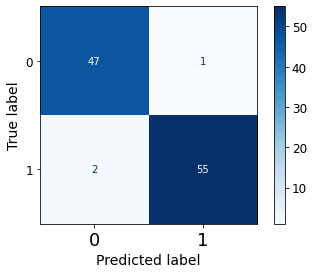

In [10]:
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train_hv, y_train)

best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

y_pred = best_svm_nonlin.predict(X_test_hv)
y_pred_proba = best_svm_nonlin.predict_proba(X_test_hv)

plot_confusion_matrix(best_svm_nonlin, X_test_hv, y_test, cmap=plt.cm.Blues)
plt.grid(False)

print('Sensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(*metrics_evaluation(y_test, y_pred)))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba[:,1])))

**Section C**

Judging by the results obtained, we can conclude that we obtain the most accurate data in the case of a **nonlinear SVM model**.

# Question 6

**Random Forest**

Sensitivity is 0.95. 
Specificity is 0.88. 
PPV is 0.92. 
NPV is 0.92. 
Accuracy is 0.92. 
F1 is 0.94. 
AUROC is 0.983


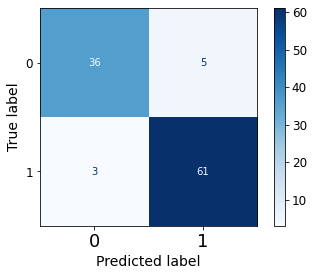

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_for_rfc, y, test_size=0.2, random_state=1, stratify = y )
rfc = Pipeline(steps=[('scale', scaler), ('rfc', rfc(max_depth=4, random_state=5, criterion='gini'))])
X_train = X_train.astype(np.int32)
X_test = X_test.astype(np.int32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
print('Sensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(*metrics_evaluation(y_test, y_pred)))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba[:,1])))

**Features selection**

Feature:                  Age, Score: 0.04237
Feature:               Gender, Score: 0.10675
Feature:  Increased Urination, Score: 0.25775
Feature:     Increased Thirst, Score: 0.27120
Feature:   Sudden Weight Loss, Score: 0.06980
Feature:             Weakness, Score: 0.00770
Feature:     Increased Hunger, Score: 0.04072
Feature:       Genital Thrush, Score: 0.01070
Feature:      Visual Blurring, Score: 0.02038
Feature:              Itching, Score: 0.01316
Feature:         Irritability, Score: 0.02548
Feature:      Delayed Healing, Score: 0.01514
Feature:      Partial Paresis, Score: 0.06713
Feature:     Muscle Stiffness, Score: 0.01270
Feature:            Hair Loss, Score: 0.03245
Feature:              Obesity, Score: 0.00545
Feature:            Diagnosis, Score: 0.00111


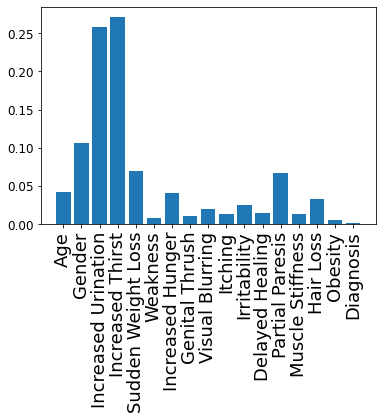

In [12]:
importances = rfc.steps[1][1].feature_importances_

for i, v in enumerate(importances):
    print('Feature: % 20s, Score: %.5f' % (col_names[i], v))

ax = plt.bar([col_names[i] for i in range(len(importances))], importances)
plt.xticks(rotation=90)
plt.show()

**1)** As stated earlier and now confirmed, the most important (indicative) factors are **increased thirst and urination**.

**2)** Undoubtedly, the results obtained agree with the main hypotheses and early tests. Increased thirst and, as a consequence, increased urination are indeed important and indicative factors of diabetes mellitus, when increased thirst occurs with an increase in the level of glycemia (for example, after eating). Other symptoms, even at lower rates, are also important, since type 1 diabetes is a structural metabolic disorder.

# Question 7

**Section A**

**Function for 2D data visualization**

In [13]:
def plot_PCA(X_pca,y,title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('B','M'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

**Data separability**

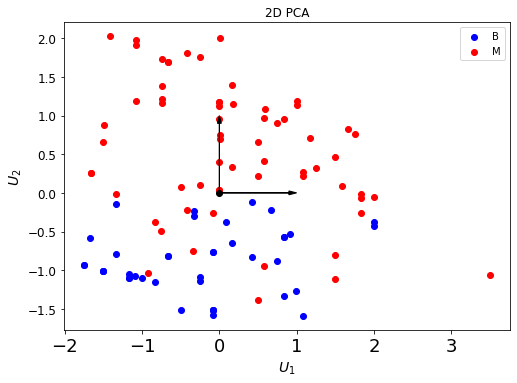

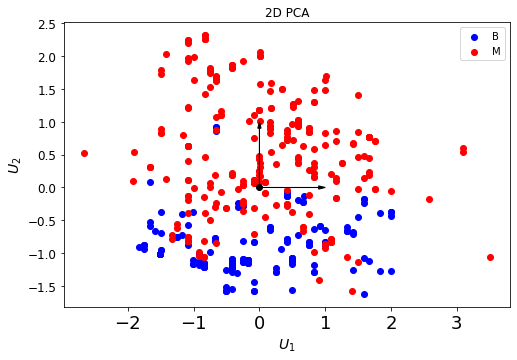

In [14]:
pca = PCA(n_components=2, whiten=True)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
plot_PCA(x_test_pca,y_test, '2D PCA for test data')
plt.show()
plot_PCA(x_train_pca,y_train, '2D PCA for train data')
plt.show()

**Section B**

The received data cannot be divided unambiguously correctly, since the data is mixed. We cannot draw a dividing line, which means the PCA does not work very well in this case.

**Section C**

**Logistic Regression**

In [15]:
skf = StratifiedKFold(n_splits=n_splits, random_state=2, shuffle=True)
log_reg = LogisticRegression(random_state=4, max_iter=max_iter, solver=solver)
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('logistic', log_reg)])
clf = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l2']},
        scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
        refit='roc_auc', verbose=0, return_train_score=True)
clf.fit(x_train_pca, y_train)
log_reg_opt_pca = clf.best_estimator_
y_pred_test = log_reg_opt_pca.predict(x_test_pca)
y_pred_proba_test = log_reg_opt_pca.predict_proba(x_test_pca)

**Logistic Regression performance**

Sensitivity is 0.88
Specificity is 0.80
PPV is 0.88
NPV is 0.80
Accuracy is 0.85
F1 is 0.88
AUROC is 0.93
Loss is 5.26


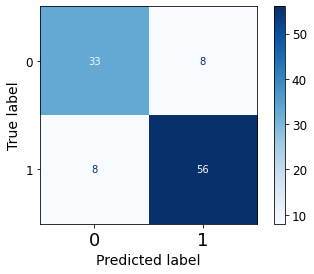

In [16]:
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+FP+TN+FN)
F1 = 2*(PPV*Se)/(PPV+Se)
print('Sensitivity is {:.2f}'.format(Se))
print('Specificity is {:.2f}'.format(Sp))
print('PPV is {:.2f}'.format(PPV))
print('NPV is {:.2f}'.format(NPV))
print('Accuracy is {:.2f}'.format(Acc))
print('F1 is {:.2f}'.format(F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))
print('Loss is {:.2f}'.format(log_loss(y_test,y_pred_test)))
plot_confusion_matrix(log_reg_opt_pca,x_test_pca,y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

**Linear SVM**

In [17]:
svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=0, return_train_score=True)
svm_lin.fit(x_train_pca, y_train)
best_svm_lin_pca = svm_lin.best_estimator_
y_pred_test = best_svm_lin_pca.predict(x_test_pca)
y_pred_proba_test = best_svm_lin_pca.predict_proba(x_test_pca)

**Linear SVM Performance**

Sensitivity is 0.88
Specificity is 0.85
PPV is 0.90
NPV is 0.81
Accuracy is 0.87
F1 is 0.89
AUROC is 0.92
Loss is 4.61


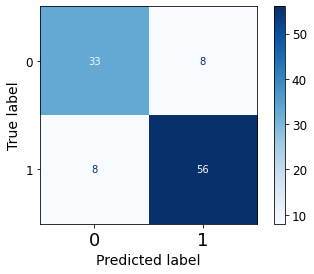

In [18]:
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+FP+TN+FN)
F1 = 2*(PPV*Se)/(PPV+Se)
print('Sensitivity is {:.2f}'.format(Se))
print('Specificity is {:.2f}'.format(Sp))
print('PPV is {:.2f}'.format(PPV))
print('NPV is {:.2f}'.format(NPV))
print('Accuracy is {:.2f}'.format(Acc))
print('F1 is {:.2f}'.format(F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))
print('Loss is {:.2f}'.format(log_loss(y_test,y_pred_test)))
plot_confusion_matrix(log_reg_opt_pca,x_test_pca,y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

**Non Linear SVM**

In [19]:
svc1 = SVC(degree=3, gamma='scale',probability=True)
C = np.array([0.001,0.1,1, 100, 1000])
param = [{'svm__C': C, 'svm__kernel': ['rbf','poly'], 'svm__gamma':['auto','scale']}]
pipe = Pipeline(steps=[('svm', svc1)])
# finding the best parameters
svm_nonlin = GridSearchCV(estimator=pipe, param_grid=param,scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlin.fit(x_train_pca, y_train)
svm_nonlin.best_params_
best_svm_nonlin_pca = svm_nonlin.best_estimator_
y_pred_test = best_svm_nonlin_pca.predict(x_test_pca)
y_pred_proba_test = best_svm_nonlin_pca.predict_proba(x_test_pca)

**Non Linear SVM Performance**

Sensitivity is 0.89
Specificity is 0.83
PPV is 0.89
NPV is 0.83
Accuracy is 0.87
F1 is 0.89
AUROC is 0.93
Loss is 4.61


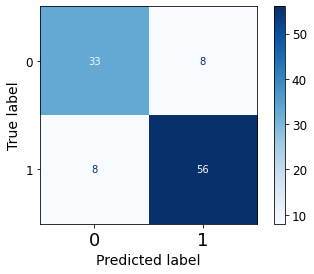

In [20]:
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+FP+TN+FN)
F1 = 2*(PPV*Se)/(PPV+Se)
print('Sensitivity is {:.2f}'.format(Se))
print('Specificity is {:.2f}'.format(Sp))
print('PPV is {:.2f}'.format(PPV))
print('NPV is {:.2f}'.format(NPV))
print('Accuracy is {:.2f}'.format(Acc))
print('F1 is {:.2f}'.format(F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))
print('Loss is {:.2f}'.format(log_loss(y_test,y_pred_test)))
plot_confusion_matrix(log_reg_opt_pca,x_test_pca,y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

**Section D**

**Logistic Regression with 2 features**

In [21]:
X_2features_train = X_train.iloc[:,[2,3]]
X_2features_test = X_test.iloc[:,[2,3]]
log_reg = LogisticRegression(random_state=1, max_iter=max_iter, solver=solver)
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('logistic', log_reg)])
clf = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l2']},
        scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
        refit='roc_auc', verbose=0, return_train_score=True)
clf.fit(X_2features_train, y_train)
log_reg_opt_2f = clf.best_estimator_
y_pred_test = log_reg_opt_2f.predict(X_2features_test)
y_pred_proba_test = log_reg_opt_2f.predict_proba(X_2features_test)

**Logistic Regression Performance**

Sensitivity is 0.91
Specificity is 0.83
PPV is 0.89
NPV is 0.85
Accuracy is 0.88
F1 is 0.90
AUROC is 0.92
Loss is 4.28


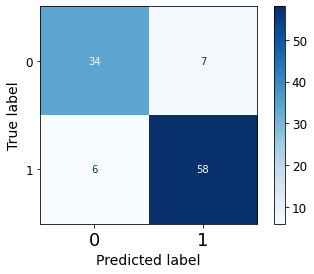

In [22]:
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+FP+TN+FN)
F1 = 2*(PPV*Se)/(PPV+Se)
print('Sensitivity is {:.2f}'.format(Se))
print('Specificity is {:.2f}'.format(Sp))
print('PPV is {:.2f}'.format(PPV))
print('NPV is {:.2f}'.format(NPV))
print('Accuracy is {:.2f}'.format(Acc))
print('F1 is {:.2f}'.format(F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))
print('Loss is {:.2f}'.format(log_loss(y_test,y_pred_test)))
plot_confusion_matrix(log_reg_opt_2f,X_2features_test,y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

**Linear SVM with 2 features**

In [23]:
svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=0, return_train_score=True)
svm_lin.fit(X_2features_train, y_train)
best_svm_lin_2f = svm_lin.best_estimator_
y_pred_test = best_svm_lin_2f.predict(X_2features_test)
y_pred_proba_test = best_svm_lin_2f.predict_proba(X_2features_test)

**Linear SVM perfomance**

Sensitivity is 0.91
Specificity is 0.83
PPV is 0.89
NPV is 0.85
Accuracy is 0.88
F1 is 0.90
AUROC is 0.92
Loss is 4.28


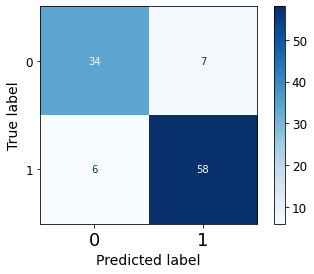

In [24]:
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+FP+TN+FN)
F1 = 2*(PPV*Se)/(PPV+Se)
print('Sensitivity is {:.2f}'.format(Se))
print('Specificity is {:.2f}'.format(Sp))
print('PPV is {:.2f}'.format(PPV))
print('NPV is {:.2f}'.format(NPV))
print('Accuracy is {:.2f}'.format(Acc))
print('F1 is {:.2f}'.format(F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))
print('Loss is {:.2f}'.format(log_loss(y_test,y_pred_test)))
plot_confusion_matrix(best_svm_lin_2f,X_2features_test,y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

**Non-Linear SVM with 2 features**

In [25]:
svc1 = SVC(degree=3, gamma='scale',probability=True)
C = np.array([0.001,0.1,1, 100, 1000])
param = [{'svm__C': C, 'svm__kernel': ['rbf','poly'], 'svm__gamma':['auto','scale']}]
pipe = Pipeline(steps=[('svm', svc1)])
svm_nonlin = GridSearchCV(estimator=pipe, param_grid=param,scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlin.fit(X_2features_train, y_train)
svm_nonlin.best_params_
best_svm_nonlin_2f = svm_nonlin.best_estimator_
y_pred_test = best_svm_nonlin_2f.predict(X_2features_test)
y_pred_proba_test = best_svm_nonlin_2f.predict_proba(X_2features_test)

**Non-Linear SVM perfomance**

Sensitivity is 0.91
Specificity is 0.83
PPV is 0.89
NPV is 0.85
Accuracy is 0.88
F1 is 0.90
AUROC is 0.92
Loss is 4.28


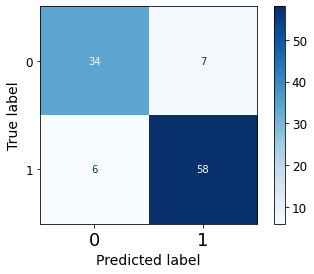

In [26]:
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+FP+TN+FN)
F1 = 2*(PPV*Se)/(PPV+Se)
print('Sensitivity is {:.2f}'.format(Se))
print('Specificity is {:.2f}'.format(Sp))
print('PPV is {:.2f}'.format(PPV))
print('NPV is {:.2f}'.format(NPV))
print('Accuracy is {:.2f}'.format(Acc))
print('F1 is {:.2f}'.format(F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))
print('Loss is {:.2f}'.format(log_loss(y_test,y_pred_test)))
plot_confusion_matrix(best_svm_nonlin_2f,X_2features_test,y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

**Section E**

PCA is better than 2 features. The fact is that, unlike 2 features, PCA works with components that give the maximum variance. As a result, we get the best vector containing components from each function placed in the PCA. We can see this by comparing the results of Accuracy, F1, AUROC, and Loss.

# Sourses

1) https://towardsdatascience.com/

2) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
